In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(12345)


In [2]:
def AppendixVI(n,factor=['A','n','A','A2','A3','c4','1/c4','B3','B4','B5','B6','d2','1/d2','d3','D1','D2','D3','D4'][-4]):
    #Note that appendix AppendixVI is based on 0.997 confidence level (i.e. z_zalpha_2`~2.97)'
    '''
    Just an alternative for looking up the table
    n: sample size
    factor: factor to be checked at n 
    '''
    AppendixVI=pd.read_csv('AppendixVI.csv',index_col='n')
    return AppendixVI[factor][n]

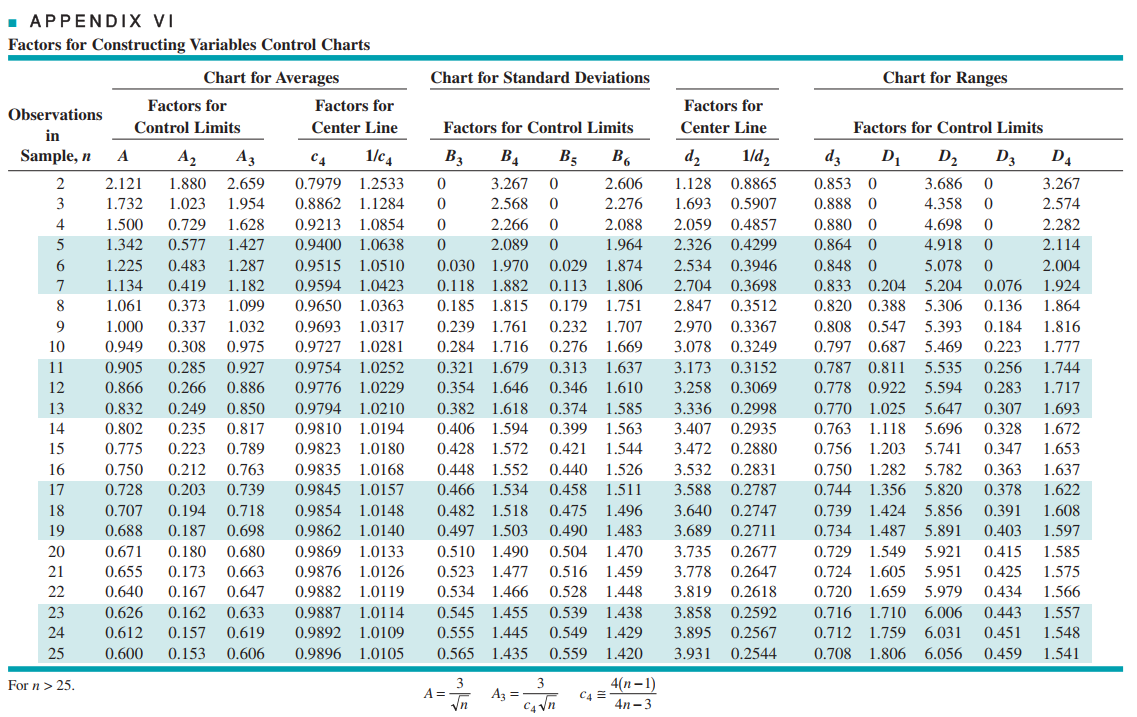

In [3]:
df=pd.read_csv("DataLab5_A_MIE304.csv",header=None)
df=df.iloc[:,1:]
df.head()

,1,2,3,4,5
0,74.030,74.002,74.019,73.992,74.008
1,73.995,73.992,74.001,74.011,74.004
2,73.988,74.024,74.021,74.005,74.002
3,74.002,73.996,73.993,74.015,74.009
4,73.992,74.007,74.015,73.989,74.014


# S Chart (Phase #1 Simple Case, no revision (i.e., no OOC samples))

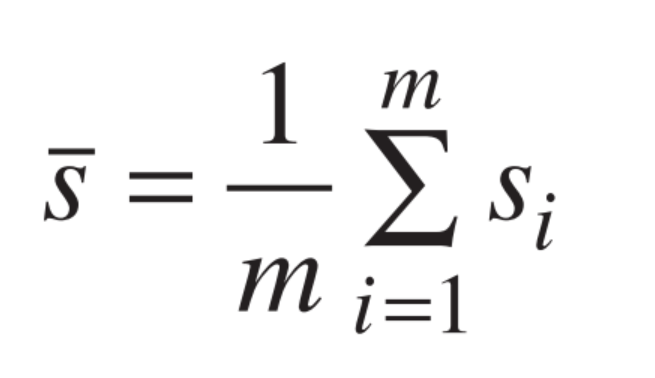

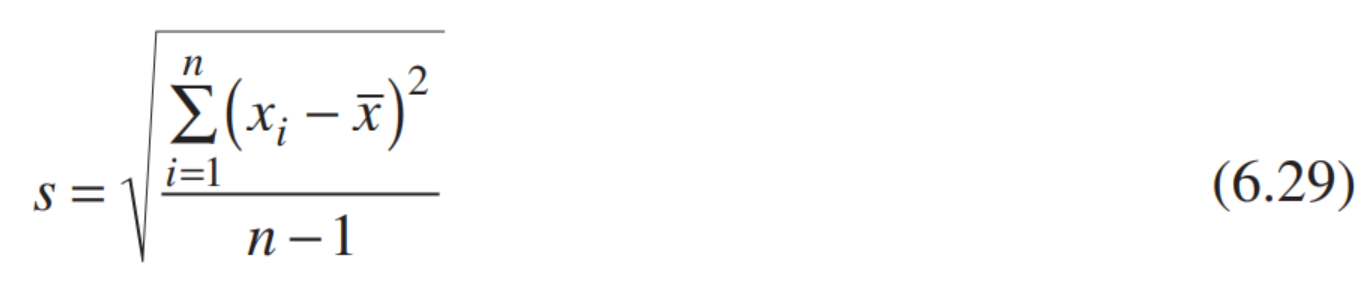

In [4]:
s=df.std(axis=1,ddof=1)
#s

In [5]:
s_bar=s.mean()
#s_bar

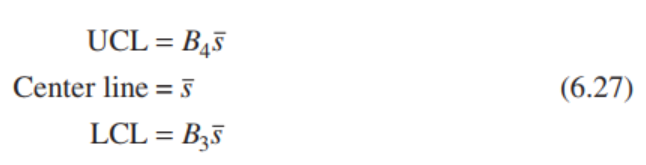

In [6]:
n=df.shape[1]
B_4=AppendixVI(n,factor='B4')
B_3=AppendixVI(n,factor='B3')
print(B_4,B_3)
UCL_s=s_bar*B_4
LCL_s=s_bar*B_3
CL_s=s_bar
print(UCL_s,CL_s,LCL_s)



2.089 0.0
0.019635521837305502 0.009399483885737435 0.0


## Verify that there is no OOC samples (still in phase 1)

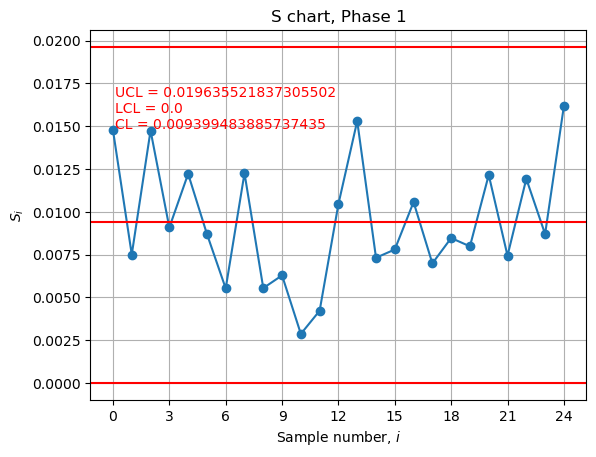

In [7]:
ax = plt.figure().gca()
ax.plot(s.index,s,marker="o")
ax.axhline(y = UCL_s, color = 'r', linestyle = '-')
ax.axhline(y = LCL_s, color = 'r', linestyle = '-')
# add text showing the value of UCL and LCL
ax.text(0.05, 0.85, 'UCL = {}\nLCL = {}\nCL = {}'.format(UCL_s, LCL_s, CL_s),
         verticalalignment='top', horizontalalignment='left',
         transform=ax.transAxes, color='red', fontsize=10)

ax.axhline(y = CL_s, color = 'r', linestyle = '-')
from matplotlib.ticker import MaxNLocator
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.grid(True)
plt.title('S chart, Phase 1')
plt.xlabel('Sample number, $i$')
plt.ylabel('$S_i$')

plt.show()


## The chart above shows that all the samples are within the control limits. And thus we conclude phase 1 and no further revision is needed in this particular case.

## Onece we are done with phase 1, we can use the control chart above to (1) estimate the process paramaters (2) do do process montoring (phase 2). Before moving to phase 2, let's estimate the process paramaters then also do phase 1 in X_bar chart then do process montoring.

74.01458906350494 74.001176 73.98776293649506


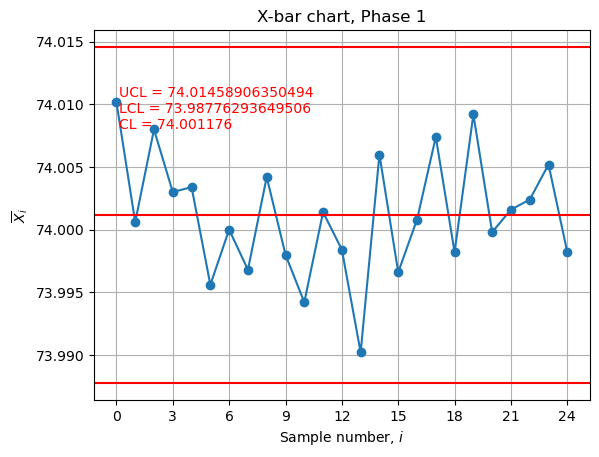

In [8]:
xbar=df.mean(axis=1) #mean for each sample
x_bar_bar=xbar.mean() #mean of all sample means
A3=AppendixVI(n,factor='A3')
UCL_x_bar=x_bar_bar+A3*s_bar
LCL_x_bar=x_bar_bar-A3*s_bar
CL_x_bar=x_bar_bar
print(UCL_x_bar,CL_x_bar,LCL_x_bar)

ax = plt.figure().gca()
ax.plot(xbar.index,xbar,marker="o")
ax.axhline(y = UCL_x_bar, color = 'r', linestyle = '-')
ax.axhline(y = LCL_x_bar, color = 'r', linestyle = '-')
ax.axhline(y = CL_x_bar, color = 'r', linestyle = '-')
ax.text(0.05, 0.85, 'UCL = {}\nLCL = {}\nCL = {}'.format(UCL_x_bar, LCL_x_bar, CL_x_bar),
         verticalalignment='top', horizontalalignment='left',
         transform=ax.transAxes, color='red', fontsize=10)
from matplotlib.ticker import MaxNLocator
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.grid(True)
plt.title('X-bar chart, Phase 1')
plt.xlabel('Sample number, $i$')
plt.ylabel('$\overline{X}_i$')
plt.show()


In [9]:
## Again, we can see that we were lucky that all the samples were good and we did not have to reject any of them. This is not always the case.
## For now since both the S and X-bar charts are under control, we can move on to the next phase. And estimate the mean and standard deviation of the process and also do phase 2.

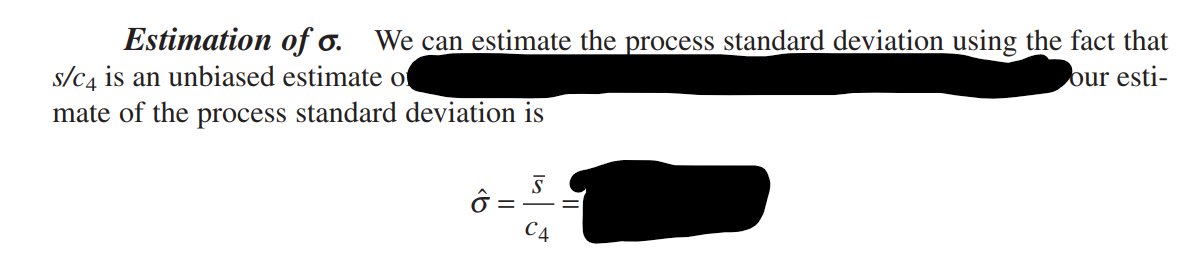




In [10]:
c_4=AppendixVI(n,factor='c4')
sigma=s_bar/c_4 #estimated of process standard deviation, think of sigma_o in hypothesis testing
print(sigma)

mu=x_bar_bar #estimated of process mean, think of mu_o in hypothesis testing
print(mu)

0.009999450942273868
74.001176


## Now we can move on to phase 2 and use the control chart we constructed in phase 1 to monitor the process in phase 2.
## To do so, we need to collect new samples and calculate the new S and X-bar values.
### In this phase, we will rely on simulation to generate new samples.
### In reality, we would collect new samples from the process and calculate the new S and X-bar values.
### In the exam you will be provided with a new set of samples to use for phase 2.


# Phase #2 with 3 sigma 
## (a special case, does not always be 3 sigma, but for now we are using 3 sigma and thus using the same UCL LCL from phase 1)

In [11]:
# Donot worry about the code below, it is just to generate new samples from in control proccess.

m=20 #number of samples
x_i_sumulated=np.random.normal(mu,sigma,size=(m,n)) #samples generated from in control process

# Now we can calculate the new S and X-bar values
s_new=pd.DataFrame(x_i_sumulated).std(axis=1,ddof=1)
xbar_new=pd.DataFrame(x_i_sumulated).mean(axis=1)

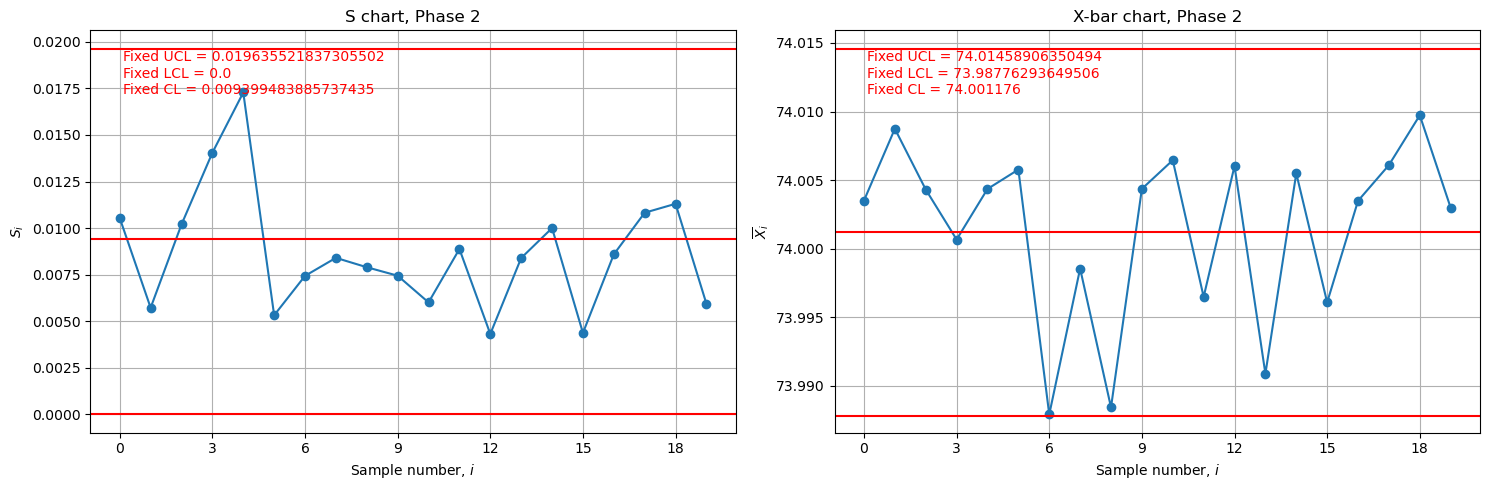

In [12]:

# Now we can plot the new S and X-bar charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

ax1.plot(s_new.index,s_new,marker="o")
ax1.axhline(y = UCL_s, color = 'r', linestyle = '-')
ax1.axhline(y = LCL_s, color = 'r', linestyle = '-')
ax1.axhline(y = CL_s, color = 'r', linestyle = '-')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax1.grid(True)
ax1.set_title('S chart, Phase 2')
ax1.set_xlabel('Sample number, $i$')
ax1.set_ylabel('$S_i$')

ax1.text(0.05, 0.95, 'Fixed UCL = {}\nFixed LCL = {}\nFixed CL = {}'.format(UCL_s, LCL_s, CL_s),
         verticalalignment='top', horizontalalignment='left',
         transform=ax1.transAxes, color='red', fontsize=10)

ax2.plot(xbar_new.index,xbar_new,marker="o")
ax2.axhline(y = UCL_x_bar, color = 'r', linestyle = '-')
ax2.axhline(y = LCL_x_bar, color = 'r', linestyle = '-')
ax2.axhline(y = CL_x_bar, color = 'r', linestyle = '-')
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
ax2.grid(True)
ax2.set_title('X-bar chart, Phase 2')
ax2.set_xlabel('Sample number, $i$')
ax2.set_ylabel('$\overline{X}_i$')

ax2.text(0.05, 0.95, 'Fixed UCL = {}\nFixed LCL = {}\nFixed CL = {}'.format(UCL_x_bar, LCL_x_bar, CL_x_bar),
         verticalalignment='top', horizontalalignment='left',
         transform=ax2.transAxes, color='red', fontsize=10)

plt.tight_layout()
plt.show()

# How long does it take our control chart to make type 1 error aka False Negative aka producer risk? 

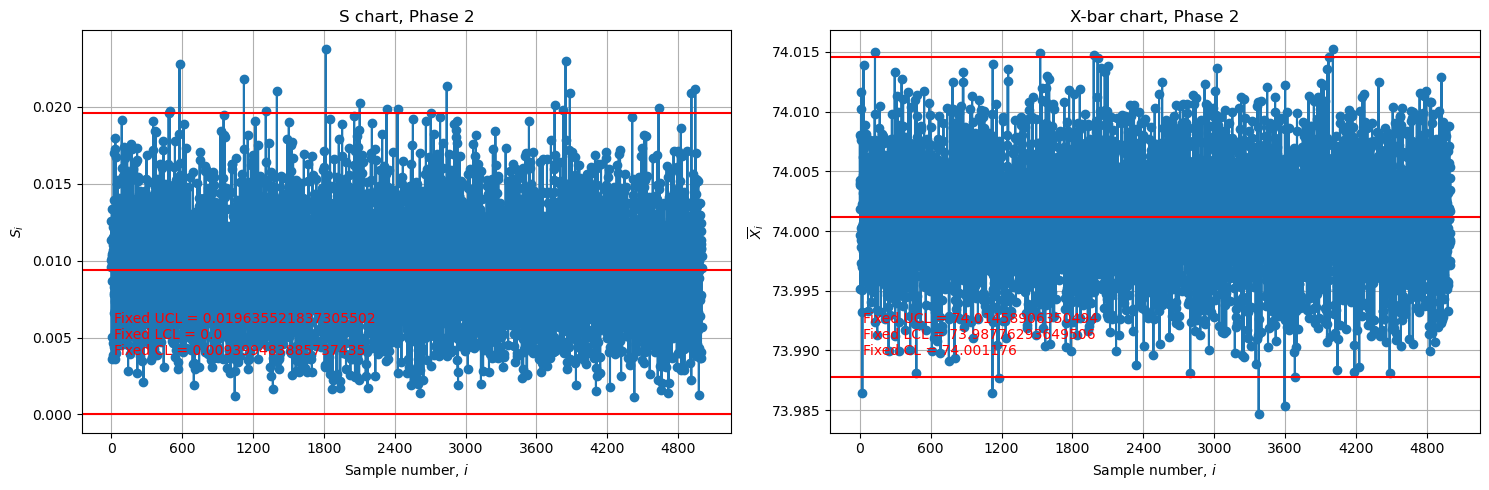

RL in X-bar=22


In [22]:
m=5000 #number of samples # Note that all of them are from in control process.
x_i_sumulated=np.random.normal(mu,sigma,size=(m,n)) #samples generated from in control process

# Now we can calculate the new S and X-bar values
s_new=pd.DataFrame(x_i_sumulated).std(axis=1,ddof=1)
xbar_new=pd.DataFrame(x_i_sumulated).mean(axis=1)

# Now we can plot the new S and X-bar charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

ax1.plot(s_new.index,s_new,marker="o")
ax1.axhline(y = UCL_s, color = 'r', linestyle = '-')
ax1.axhline(y = LCL_s, color = 'r', linestyle = '-')
ax1.axhline(y = CL_s, color = 'r', linestyle = '-')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax1.grid(True)
ax1.set_title('S chart, Phase 2')
ax1.set_xlabel('Sample number, $i$')
ax1.set_ylabel('$S_i$')

ax1.text(0.05, 0.3, 'Fixed UCL = {}\nFixed LCL = {}\nFixed CL = {}'.format(UCL_s, LCL_s, CL_s),
         verticalalignment='top', horizontalalignment='left',
         transform=ax1.transAxes, color='red', fontsize=10)

ax2.plot(xbar_new.index,xbar_new,marker="o")
ax2.axhline(y = UCL_x_bar, color = 'r', linestyle = '-')
ax2.axhline(y = LCL_x_bar, color = 'r', linestyle = '-')
ax2.axhline(y = CL_x_bar, color = 'r', linestyle = '-')
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
ax2.grid(True)
ax2.set_title('X-bar chart, Phase 2')
ax2.set_xlabel('Sample number, $i$')
ax2.set_ylabel('$\overline{X}_i$')

ax2.text(0.05, 0.3, 'Fixed UCL = {}\nFixed LCL = {}\nFixed CL = {}'.format(UCL_x_bar, LCL_x_bar, CL_x_bar),
         verticalalignment='top', horizontalalignment='left',
         transform=ax2.transAxes, color='red', fontsize=10)

plt.tight_layout()
plt.show()
first_out_of_control_xbar=xbar_new[(xbar_new>UCL_x_bar) | (xbar_new<LCL_x_bar)].index[0]
print(f'RL in X-bar={first_out_of_control_xbar}')

# Run Length as a random variable

In [20]:
RL_list_xbar=[]
for simulation in range(1000):
    m=5000 #number of samples # Note that all of them are from in control process.
    x_i_sumulated=np.random.normal(mu,sigma,size=(m,n)) #samples generated from in control process

    # Now we can calculate the new S and X-bar values
    s_new=pd.DataFrame(x_i_sumulated).std(axis=1,ddof=1)
    xbar_new=pd.DataFrame(x_i_sumulated).mean(axis=1)

    # find the index of first out of control point in the xbar chart
    first_out_of_control_xbar=xbar_new[(xbar_new>UCL_x_bar) | (xbar_new<LCL_x_bar)].index[0]
    RL_list_xbar.append(first_out_of_control_xbar)


ARL Simulation=360.37
Alpha=0.0030000000000000027, Note that appendix AppendixVI is based on 0.997 confidence level (i.e. z_zalpha_2`~2.97
ARL Analytical=333.33333333333303


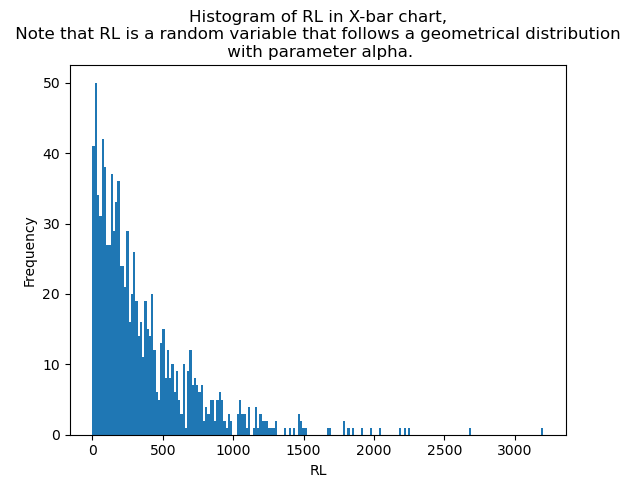

In [24]:
plt.hist(RL_list_xbar,bins=200)
plt.xlabel('RL')
plt.ylabel('Frequency')
plt.title('Histogram of RL in X-bar chart,\n Note that RL is a random variable that follows a geometrical distribution \n with parameter alpha.')

print(f'ARL Simulation={np.mean(RL_list_xbar)}')
alpha=1-0.997
print(f'Alpha={alpha}, Note that appendix AppendixVI is based on 0.997 confidence level (i.e. z_zalpha_2`~2.97')
print(f'ARL Analytical={1/alpha}')


More on that in the next lab
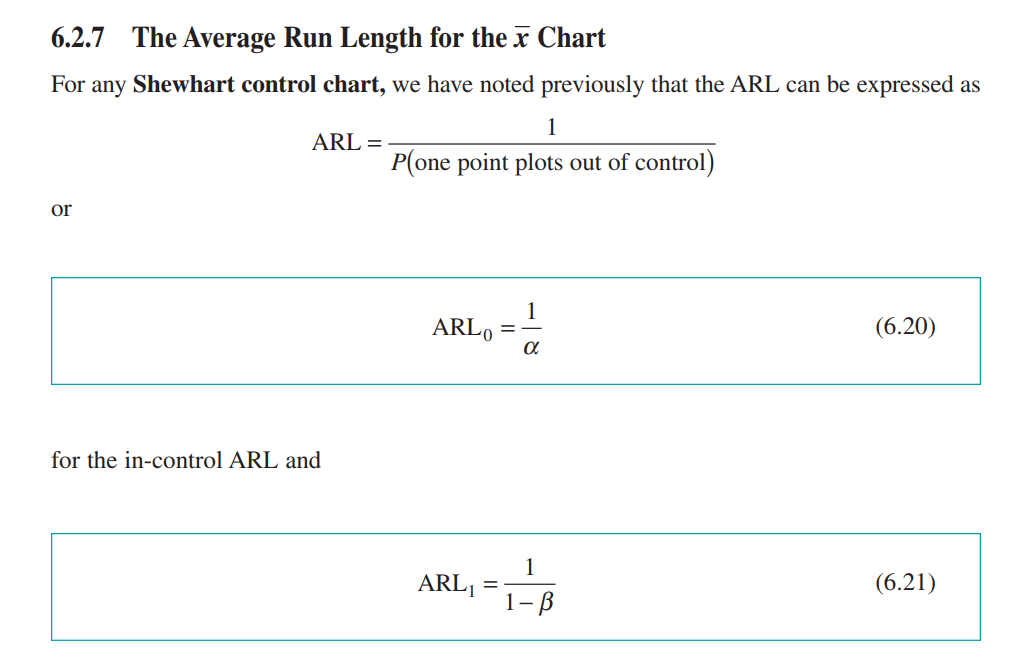